# Forest Fire Detection Model

## Setting up Virtual Environment for Jupyter in VS Code

Follow these steps to create and use a virtual environment with this notebook:

1. Open a terminal in VS Code
2. Navigate to your project directory
3. Create a virtual environment called `.flask-venv`:
   ```bash
   python -m venv .flask-venv
   ```
4. Activate the virtual environment:
   - On macOS/Linux: `source .flask-venv/bin/activate`
   - On Windows: `.flask-venv\Scripts\activate`
5. Install ipykernel to make the venv available to Jupyter:
   ```bash
   pip install ipykernel
   ```
6. Register the venv as a Jupyter kernel:
   ```bash
   python -m ipykernel install --user --name=flask-venv --display-name "Python (.flask-venv)"
   ```
7. Restart VS Code
8. Open this notebook and select the kernel called "Python (.flask-venv)" from the kernel selector in the top right corner

You can verify the active kernel is using your venv by running the cell below.

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns
import kagglehub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW

2025-05-15 04:04:55.579102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christian/Desktop/MASTER/1 year/Semester 1/SOFTWARE ENGINEERING 2/RESEARCH PROJECT/adaptative-resource-management-ai/flask-app/.flask-venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!rm -rf /kaggle/working/*

zsh:1: no matches found: /kaggle/working/*


In [2]:
data_dir = kagglehub.dataset_download("alik05/forest-fire-dataset")
test_folder = f'{data_dir}/Forest Fire Dataset/Testing'

data_dir

'/Users/christian/.cache/kagglehub/datasets/alik05/forest-fire-dataset/versions/1'

In [3]:
Training = tf.keras.utils.image_dataset_from_directory(f'{data_dir}/Forest Fire Dataset/Training', image_size=(8, 8), batch_size=3)
Training = Training.map(lambda x,y: (x/255, y))
len(Training)

Found 1520 files belonging to 2 classes.


507

In [ ]:
import numpy as np
train_size = int(len(Training)*.8*0.01)
test_size = int(len(Training)*.2*0.01)

print("train_size:",train_size,"test_size:",test_size)
train = Training.take(train_size)
test = Training.skip(train_size).take(test_size)
print(train,test)

model = Sequential()
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(8,8,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

hist = model.fit(train, epochs=1, validation_data=test, verbose=0)
def generate_features(dataset):
    all_features = []
    all_labels = []

    for images, labels in dataset:
        features = model.predict(images, verbose=0)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = generate_features(train)
test_features, test_labels = generate_features(test)



pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for images, labels in test:
    predictions = model.predict(images, verbose=0)

    pre.update_state(labels, predictions)
    re.update_state(labels, predictions)
    acc.update_state(labels, predictions)

acc.result().numpy()

train_size: 4 test_size: 1
<_TakeDataset element_spec=(TensorSpec(shape=(None, 8, 8, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, 8, 8, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 6, 6, 8)           224       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 3, 8)           0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 72)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 73     

0.33333334

In [ ]:
import os
import shutil

# Define source directory
source_directory = test_folder

# Define destination directories
fire_directory = '/kaggle/working/Testing/fire'
nofire_directory = '/kaggle/working/Testing/nofire'

# Create fire and nofire directories if they don't exist
os.makedirs(fire_directory, exist_ok=True)
os.makedirs(nofire_directory, exist_ok=True)

# Iterate through files in the source directory
for filename in os.listdir(source_directory):
    source_path = os.path.join(source_directory, filename)
    if filename.startswith('fire_'):
        shutil.copy(source_path, os.path.join(fire_directory, filename))
    elif filename.startswith('nofire_'):
        shutil.copy(source_path, os.path.join(nofire_directory, filename))

print("Images moved successfully.")

Images moved successfully.


: 

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
Testing = tf.keras.utils.image_dataset_from_directory('/kaggle/working/Testing',image_size=(250,250))

Found 380 files belonging to 2 classes.


In [ ]:
for batch in Testing.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


2024-04-28 16:58:02.104471: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[28,125,122,122]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,250,124,124]{3,2,1,0}, f32[125,250,3,3]{3,2,1,0}, f32[125]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-28 16:58:02.140607: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.036238318s
Trying algorithm eng36{k2=3,k3=0} for conv (f32[28,125,122,122]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,250,124,124]{3,2,1,0}, f32[125,250,3,3]{3,2,1,0}, f32[125]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a whil

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


In [ ]:
print(f'Precision:{pre.result()},Recall:{re.result()},Accuracy:{acc.result()}')

Precision:0.9833333492279053,Recall:0.9315789341926575,Accuracy:0.9578947424888611


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


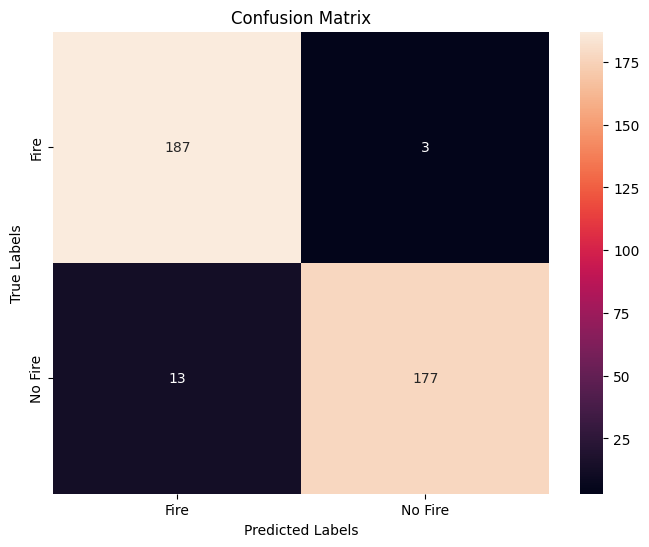

In [ ]:
# Initialize the lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation data
for batch in Testing.as_numpy_iterator():
    X, y = batch
    
    # Predict using the model
    yhat = model.predict(X)
    
    # Convert predicted probabilities to class labels based on threshold
    y_classes = [1 if pred > 0.5 else 0 for pred in yhat]
    
    # Update true and predicted labels lists
    true_labels.extend(y)
    predicted_labels.extend(y_classes)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
labels = ['Fire', 'No Fire']
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show() 